## Overall Figures of Thomas Conlon's smoking project (2m and 4m)

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# custom functions
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

Running Scanpy 1.7.1, on 2021-09-28 13:01.


In [2]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/macrophages_smoking_THOMAS/02_figures/ALL_2m+4m/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
## path variables
adata_path = '/mnt/platte_1/Projects/200217_SmokedMice_all/200426_Smoked_Mice_allcells_noMixture_refined_annotation_NIKLAS.h5ad'

In [4]:
## load data
adata = sc.read(adata_path)

In [5]:
## explore meta data of adata object
adata

AnnData object with n_obs × n_vars = 68256 × 27780
    obs: 'air', 'condition', 'identifier', 'name', 'timepoint', 'n_counts', 'n_genes', 'percent.mito', 'QC_group', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain', 'louvain_2', 'cell_type', 'cell_type_condition', 'louvain_3', 'cell_type_nano', 'meta_cell_type', 'cell_type_refined'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'n_counts'
    uns: 'cell_type_colors', 'cell_type_nano_colors', 'cell_type_refined_colors', 'condition_colors', 'dendrogram_louvain_2', 'louvain', 'louvain_1_colors', 'louvain_2_colors', 'louvain_3_colors', 'neighbors', 'pca', 'rank_genes_groups', 'timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs.cell_type_refined.cat.categories

Index(['AM', 'AT1', 'AT2', 'B cells', 'Basophils',
       'CS-induced Inhba+/Lilr4b+/Tcirg1+ Macrophages',
       'CS-induced Inhba+/Spp1+ Macrophages', 'Cd103+/Clec9a+ cDC',
       'Cd209+/Cd11b+ cDC', 'Club', 'Fibroblasts', 'Fscn1+ DC', 'LEC',
       'Ly6c2+ classical Monocytes', 'Ly6c2- non-classical Monocytes',
       'Lyve1+/Cd163+ IM', 'Lyve1-/Cd163- IM', 'Mesothelium', 'Mki67+',
       'Mucous ciliated', 'NK cells', 'Neutrophils', 'Pbpb+ cells',
       'Plasma cells', 'Prg4+ IM', 'SMC/Peri', 'T cells', 'VEC', 'aCap',
       'gCap'],
      dtype='object')

In [7]:
## only include 2m and 4m - to be consistent with experimental set up
adata = adata[adata.obs.timepoint.isin(['2 months','4 months'])].copy()
## remove outliers (< 10 cells)
adata = adata[-adata.obs.cell_type_refined.isin(['CS-induced Inhba+/Lilr4b+/Tcirg1+ Macrophages'])].copy() ## apart from a few outliers only present after 6 months

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### Overview UMAPs

In [8]:
adata.obs.cell_type_refined.cat.categories

Index(['AM', 'AT1', 'AT2', 'B cells', 'Basophils',
       'CS-induced Inhba+/Spp1+ Macrophages', 'Cd103+/Clec9a+ cDC',
       'Cd209+/Cd11b+ cDC', 'Club', 'Fibroblasts', 'Fscn1+ DC', 'LEC',
       'Ly6c2+ classical Monocytes', 'Ly6c2- non-classical Monocytes',
       'Lyve1+/Cd163+ IM', 'Lyve1-/Cd163- IM', 'Mesothelium', 'Mki67+',
       'Mucous ciliated', 'NK cells', 'Neutrophils', 'Pbpb+ cells',
       'Plasma cells', 'Prg4+ IM', 'SMC/Peri', 'T cells', 'VEC', 'aCap',
       'gCap'],
      dtype='object')

In [9]:
adata.obs['cell_type_refined'] = adata.obs['cell_type_refined'].cat.reorder_categories([
    ## epithelium ##
    'AT1',
    'AT2',
    'Club',
    'Mucous ciliated',
    ## endothelium ##
    'VEC',
    'gCap',
    'aCap',
    'LEC',
    ## mesenchyme ##
    'Fibroblasts',
    'Mesothelium',
    'SMC/Peri',
    ## MNPs ##
    'AM',
    'CS-induced Inhba+/Spp1+ Macrophages',
    'Lyve1+/Cd163+ IM', 
    'Lyve1-/Cd163- IM',
    'Prg4+ IM',
    'Ly6c2- non-classical Monocytes',
    'Ly6c2+ classical Monocytes',
    'Cd209+/Cd11b+ cDC',
    'Cd103+/Clec9a+ cDC',
    'Fscn1+ DC',
    ## Granulocytes ##
    'Basophils',
    'Neutrophils',
    ## Lymphocytes ##
    'B cells',
    'Plasma cells', 
    'T cells',
    'NK cells',
    ## Proliferating ##
    'Pbpb+ cells',
    'Mki67+'
])

In [10]:
## recalculate UMAP
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:32)


### Figure 5 h and i

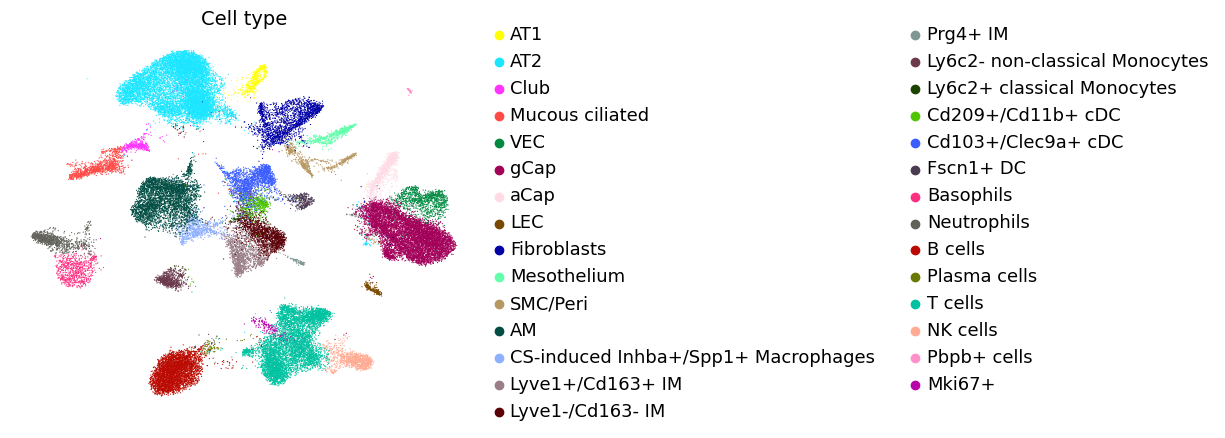

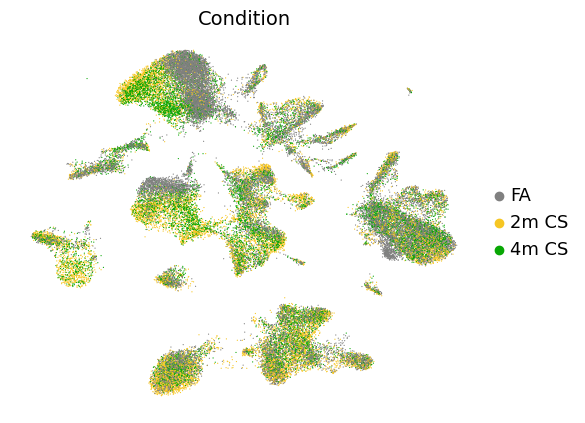

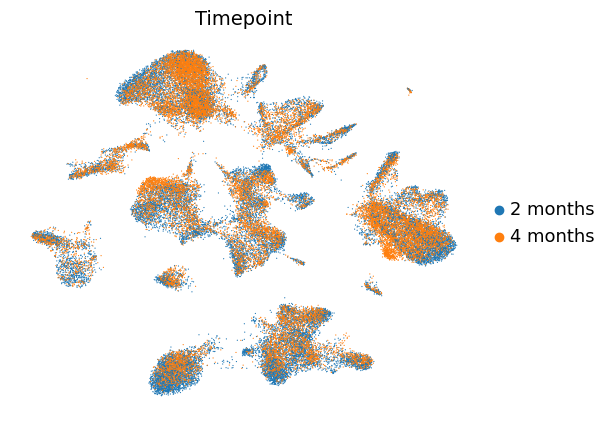

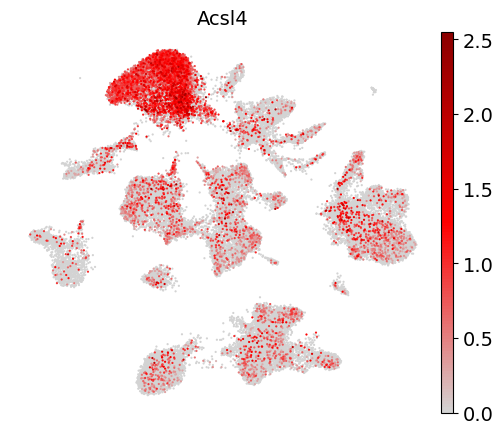

In [11]:
## save UMAPs of MNPs
sc.pl.umap(adata, color = ['cell_type_refined'], title = 'Cell type', frameon = False, 
           ax = mysize(6, 5, 100), size = 3,save = '_celltype.pdf')
sc.pl.umap(adata, color = ['condition'], title = 'Condition', frameon = False, 
           ax = mysize(6, 5, 100), size = 3, save = '_condition.pdf')
sc.pl.umap(adata, color = ['timepoint'], title = 'Timepoint', frameon = False, 
           ax = mysize(6, 5, 100), size = 3, save = '_timepoint.pdf')
sc.pl.umap(adata, color = ['Acsl4'], frameon = False, cmap = gray_red,
           ax = mysize(6, 5, 100), size = 10, save = '_Acsl4.pdf')

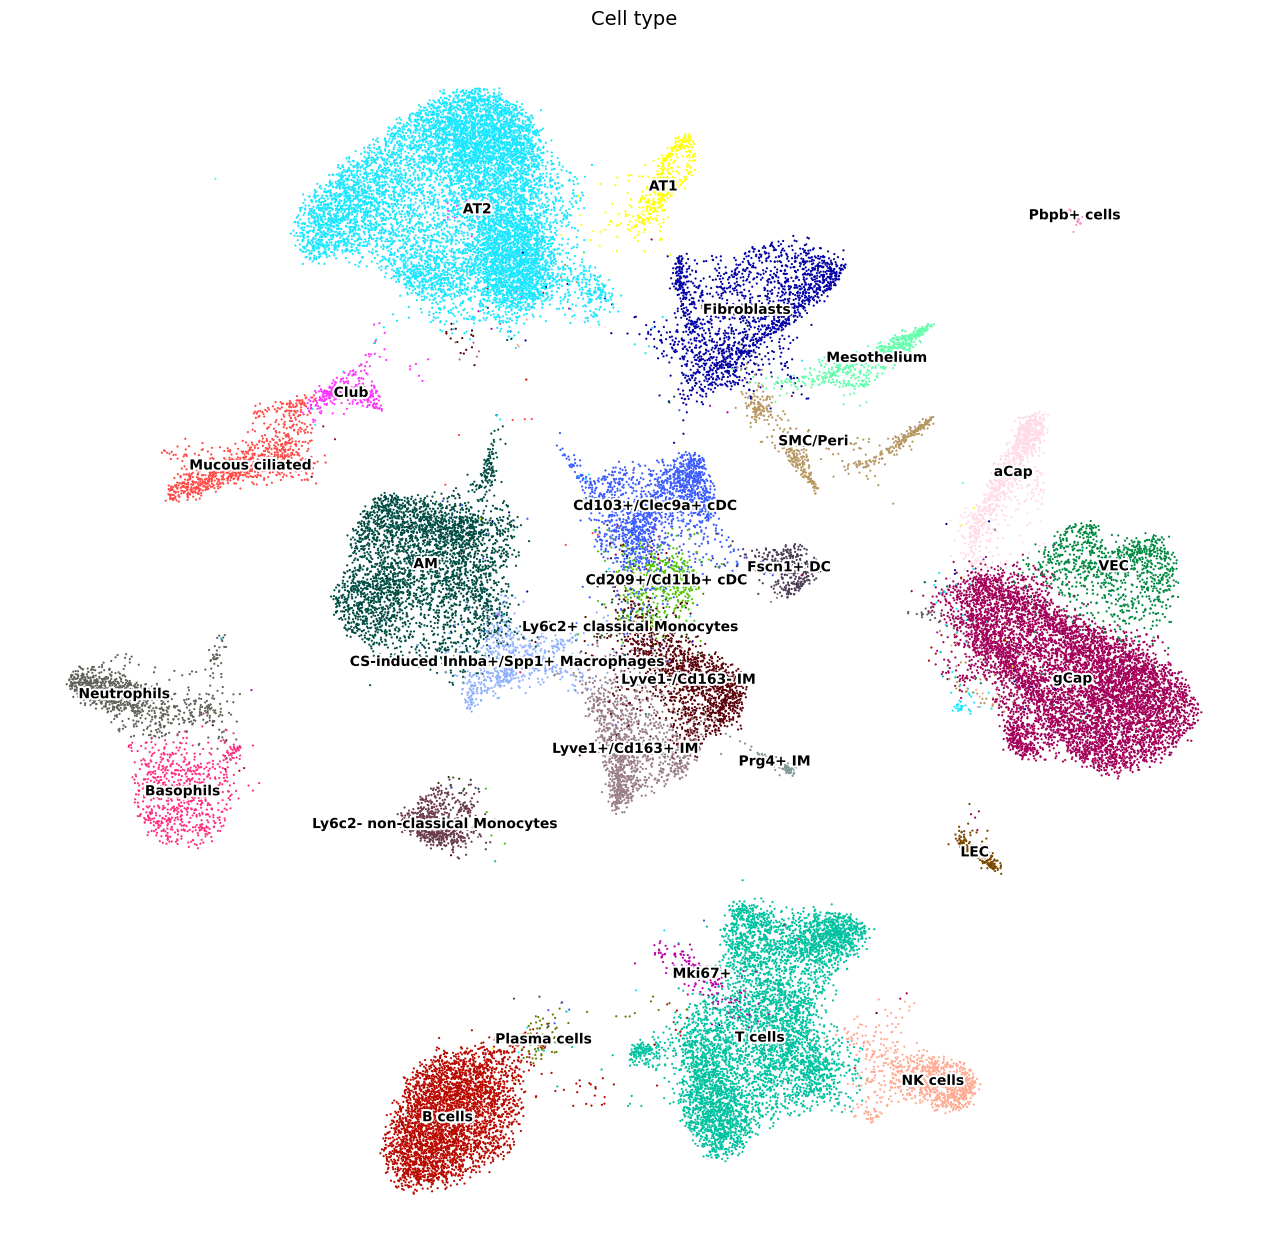

In [12]:
## pretty overview UMAP
sc.pl.umap(adata, color = ['cell_type_refined'], title = 'Cell type', 
           frameon = False, size = 10,
           legend_loc = 'on data', legend_fontsize =10, legend_fontoutline = 3,
           ax = mysize(16,16, 100), save = '_celltype_on_data.pdf')

### Supplementary Fig 3 c

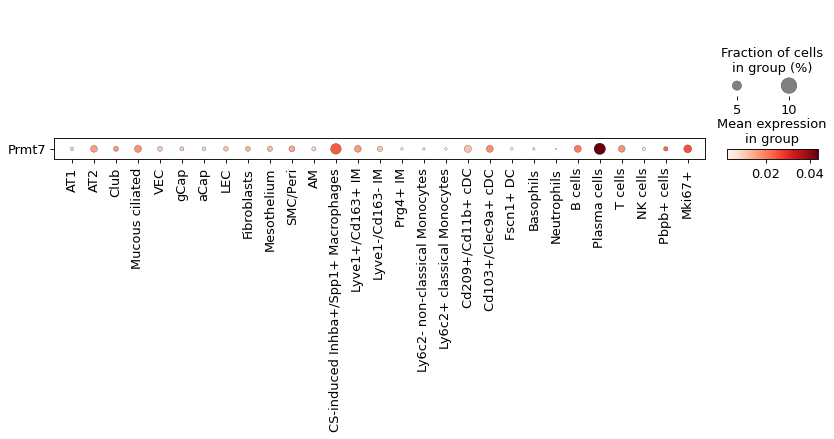

In [13]:
sc.pl.dotplot(adata, var_names = ['Prmt7'], groupby = 'cell_type_refined', swap_axes = True,
             save = 'ALL_Prmt7_expression.pdf')

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


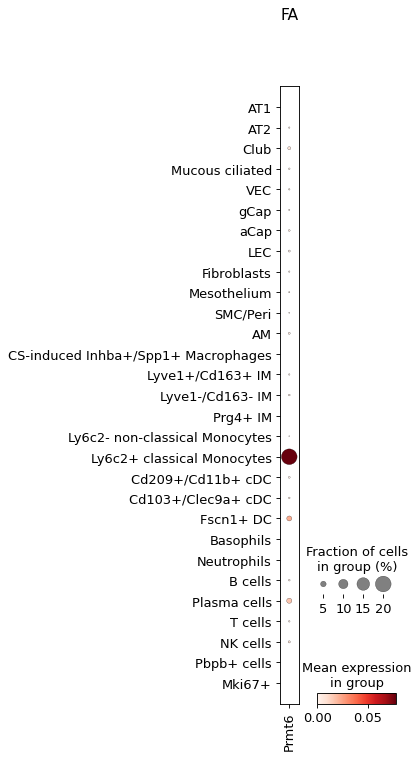

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


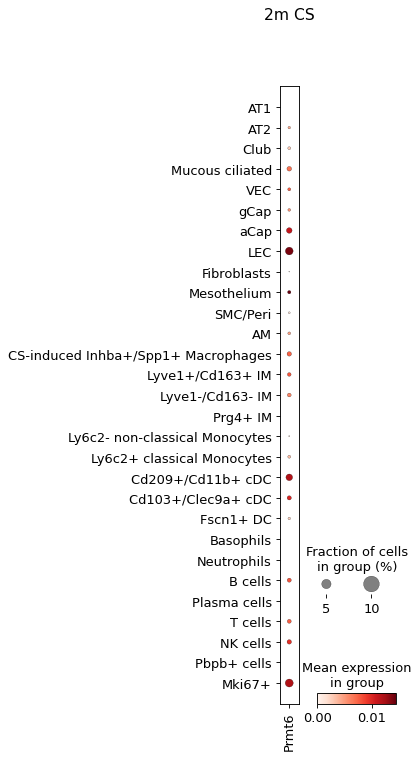

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


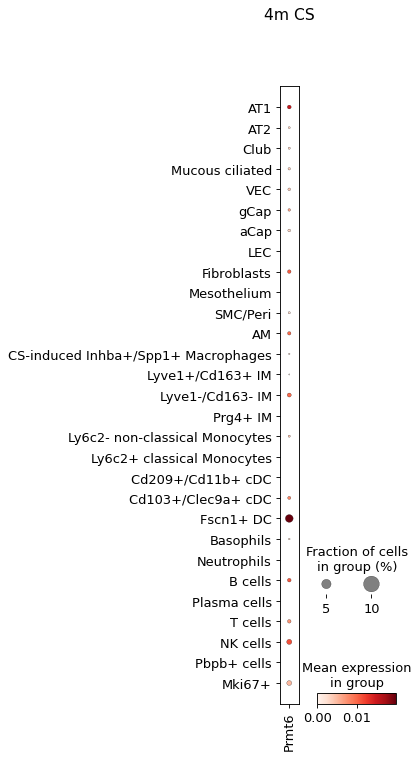

In [14]:
## and Prmt7 expression per cell type in each condition
sc.pl.dotplot(adata[adata.obs.condition.isin(['FA'])], var_names = ['Prmt6'], groupby = 'cell_type_refined',
             title = 'FA', save = 'ALL_Prmt6_expression_FA.pdf')
sc.pl.dotplot(adata[adata.obs.condition.isin(['2m CS'])], var_names = ['Prmt6'], groupby = 'cell_type_refined',
             title = '2m CS', save = 'ALL_Prmt6_expression_2mCS.pdf')
sc.pl.dotplot(adata[adata.obs.condition.isin(['4m CS'])], var_names = ['Prmt6'], groupby = 'cell_type_refined',
             title = '4m CS', save = 'ALL_Prmt6_expression_4mCS.pdf')

### Supplementary Fig 18 e

In [15]:
## compute marker
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_refined', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:20)


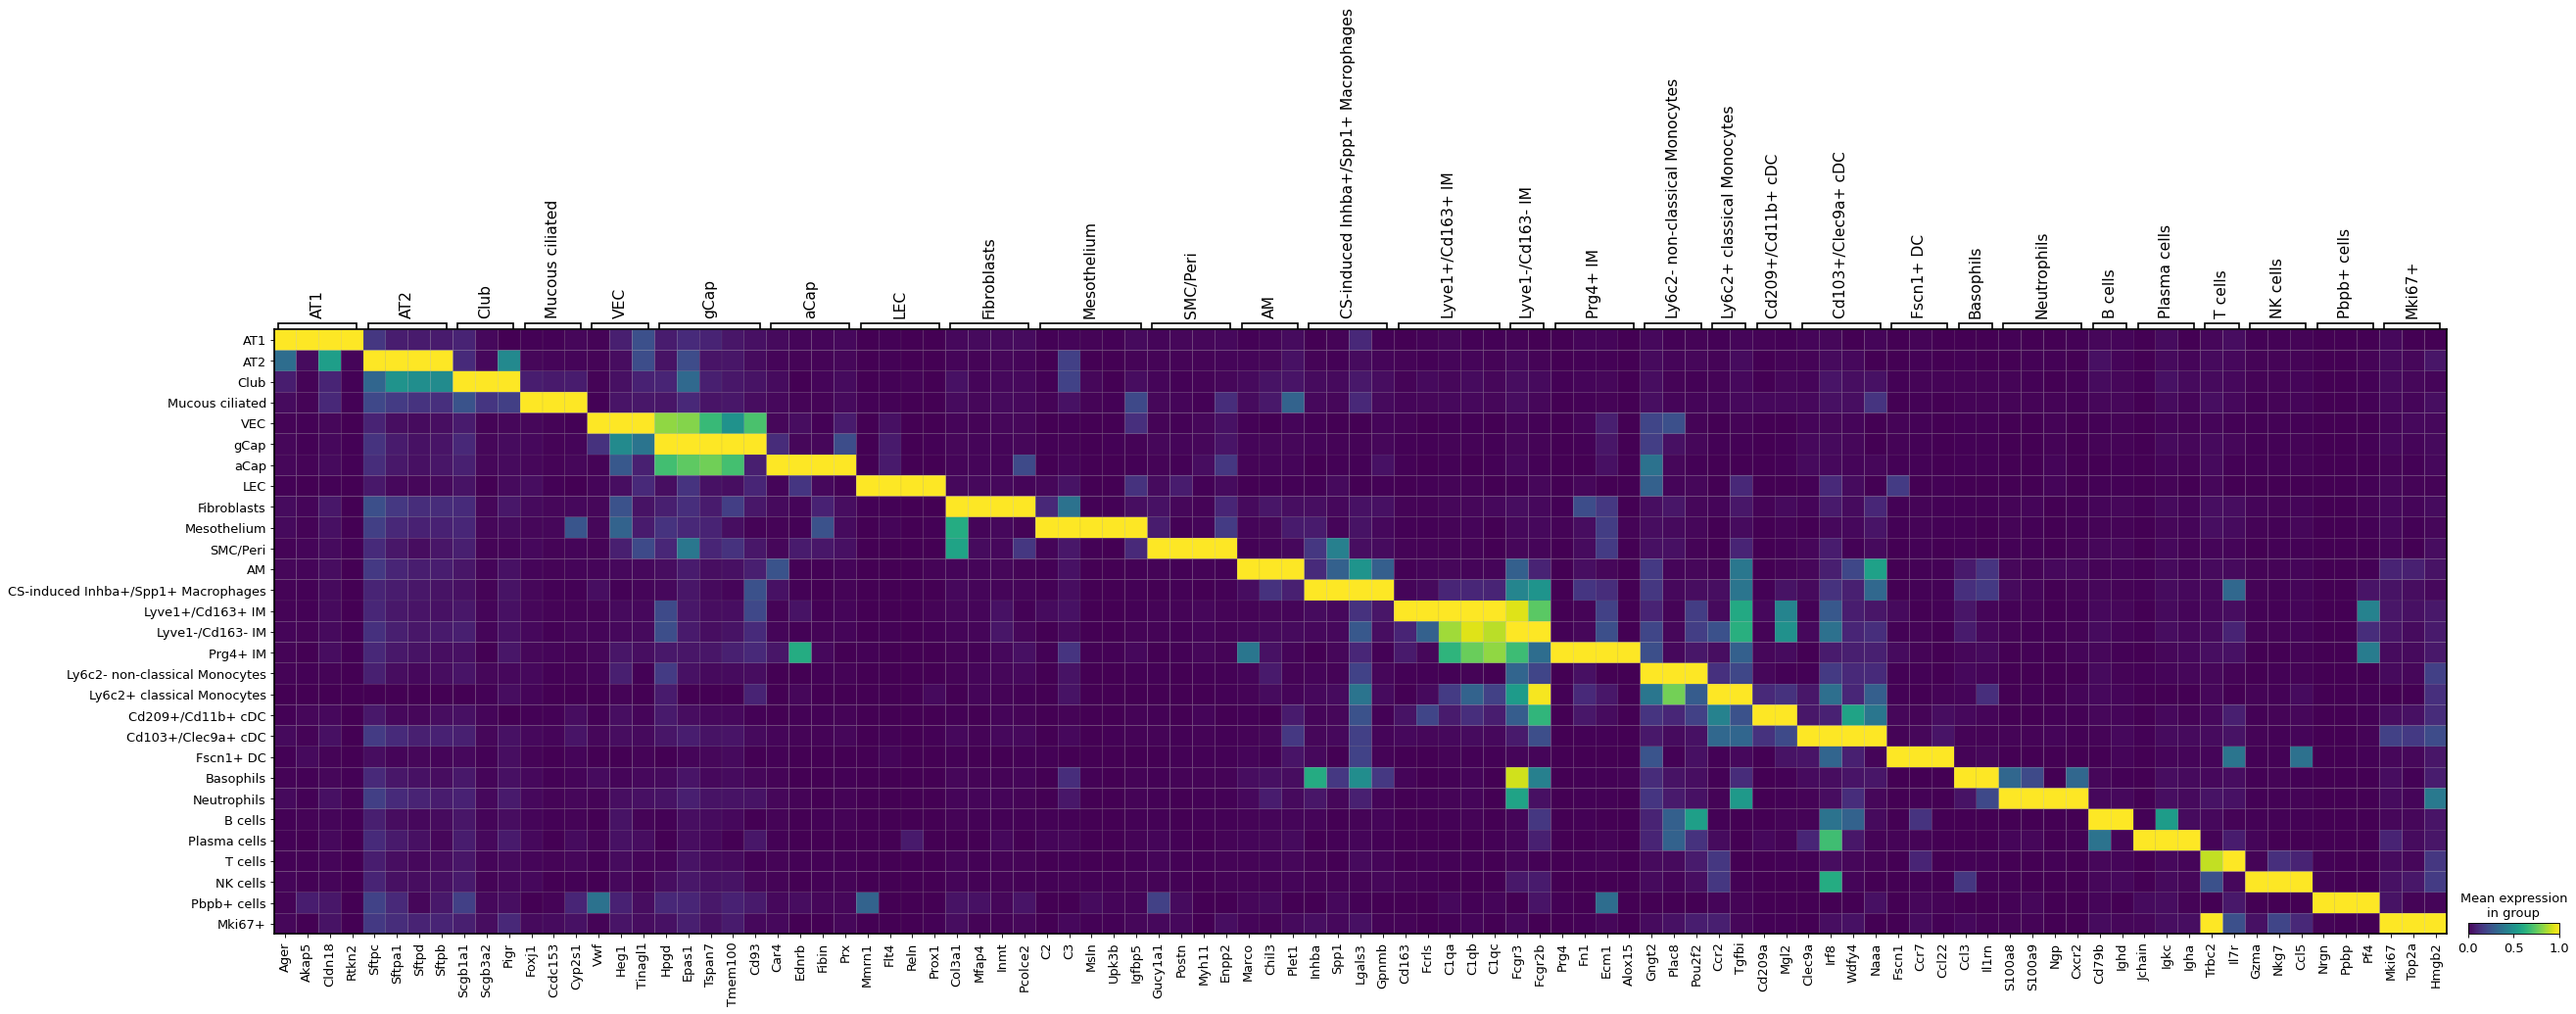

In [16]:
## curated heatmap
celltype_markers={## epithelium ##
    'AT1' : ['Ager','Akap5','Cldn18','Rtkn2'],
    'AT2' : ['Sftpc','Sftpa1','Sftpd','Sftpb'],
    'Club' : ['Scgb1a1','Scgb3a2','Pigr'],
    'Mucous ciliated' : ['Foxj1','Ccdc153','Cyp2s1'],
    ## endothelium ##
    'VEC' : ['Vwf','Heg1','Tinagl1'],
    'gCap' : ['Hpgd','Epas1','Tspan7','Tmem100','Cd93'],
    'aCap' : ['Car4','Ednrb','Fibin','Prx'],
    'LEC' : ['Mmrn1','Flt4','Reln','Prox1'],
    ## mesenchyme ##
    'Fibroblasts' : ['Col3a1','Mfap4','Inmt','Pcolce2'],
    'Mesothelium' : ['C2','C3','Msln','Upk3b','Igfbp5'],
    'SMC/Peri' : ['Gucy1a1','Postn','Myh11','Enpp2'],
    ## MNPs ##
    'AM' : ['Marco','Chil3','Plet1'],
    'CS-induced Inhba+/Spp1+ Macrophages' : ['Inhba','Spp1','Lgals3','Gpnmb'],
    'Lyve1+/Cd163+ IM' : ['Cd163','Fcrls','C1qa','C1qb','C1qc'], 
    'Lyve1-/Cd163- IM' : ['Fcgr3','Fcgr2b'],
    'Prg4+ IM' : ['Prg4','Fn1','Ecm1','Alox15'],
    'Ly6c2- non-classical Monocytes' : ['Gngt2','Plac8','Pou2f2'],
    'Ly6c2+ classical Monocytes' : ['Ccr2','Tgfbi'],
    'Cd209+/Cd11b+ cDC' : ['Cd209a','Mgl2'],
    'Cd103+/Clec9a+ cDC' : ['Clec9a','Irf8','Wdfy4','Naaa'],
    'Fscn1+ DC' : ['Fscn1','Ccr7','Ccl22'],
    ## Granulocytes ##
    'Basophils' : ['Ccl3','Il1rn'],
    'Neutrophils' : ['S100a8','S100a9','Ngp','Cxcr2'],
    ## Lymphocytes ##
    'B cells' : ['Cd79b','Ighd'],
    'Plasma cells' : ['Jchain','Igkc','Igha'], 
    'T cells' : ['Trbc2','Il7r'],
    'NK cells' : ['Gzma','Nkg7','Ccl5'],
    ## Proliferating ##
    'Pbpb+ cells' : ['Nrgn','Ppbp','Pf4'],
    'Mki67+' : ['Mki67','Top2a','Hmgb2']
}

sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type_refined',standard_scale='var',
                 dendrogram=False, save='curated_marker_matrix.pdf')

    using 'X_pca' with n_pcs = 60
Storing dendrogram info using `.uns['dendrogram_cell_type_refined']`


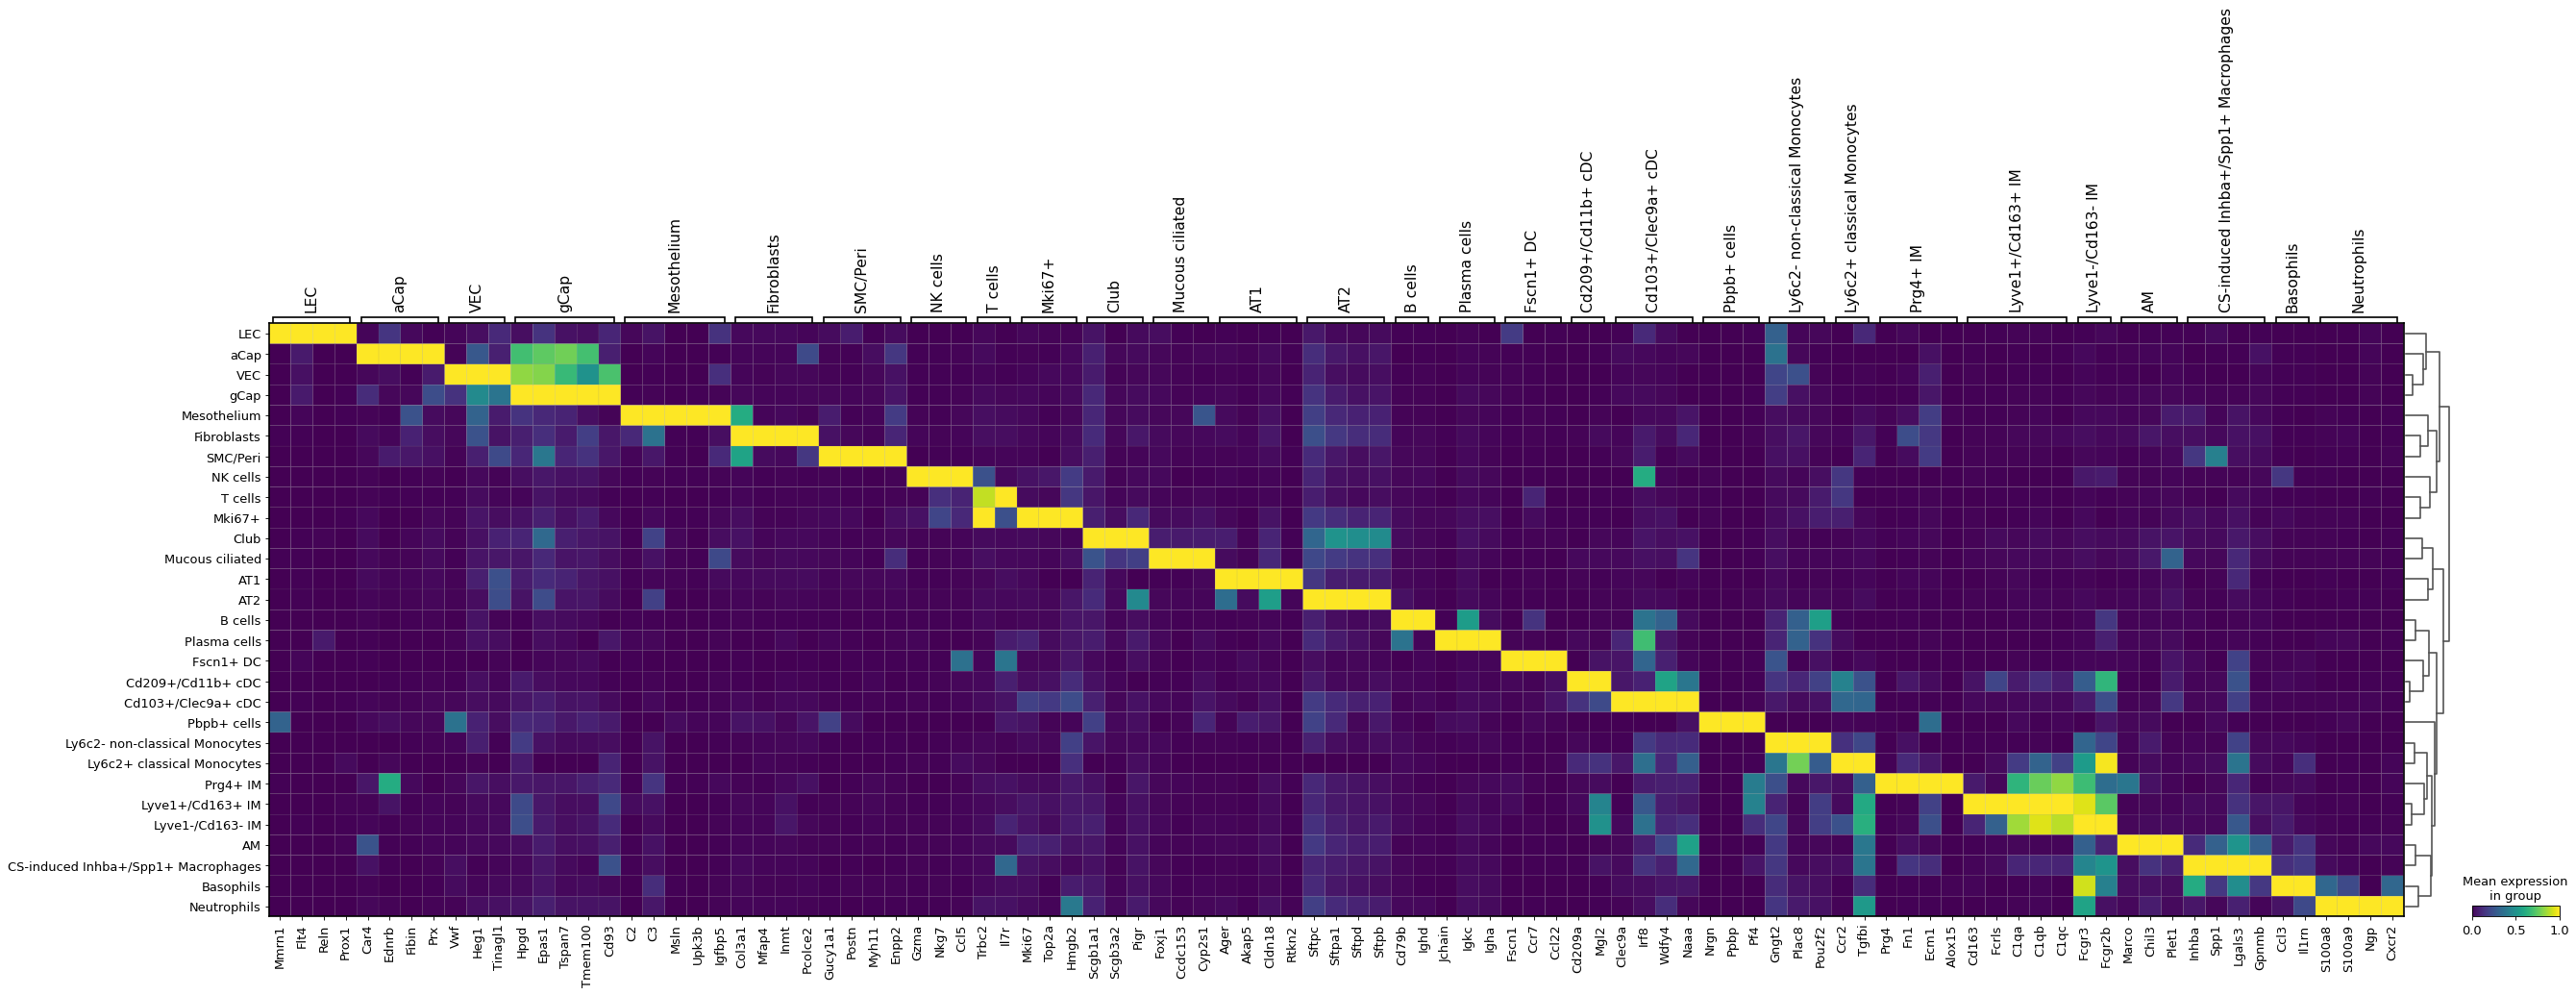

In [17]:
## curated heatmap with dendrogram
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type_refined',standard_scale='var',
                 dendrogram=True, save='curated_marker_matrix_dendrogram.pdf')

### Markers distinguishing CS-induced Spp1+ Inhba+ Macrophages from all other myeloid cell types/states

In [18]:
adata.obs.cell_type_refined.cat.categories

Index(['AT1', 'AT2', 'Club', 'Mucous ciliated', 'VEC', 'gCap', 'aCap', 'LEC',
       'Fibroblasts', 'Mesothelium', 'SMC/Peri', 'AM',
       'CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM',
       'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2- non-classical Monocytes',
       'Ly6c2+ classical Monocytes', 'Cd209+/Cd11b+ cDC', 'Cd103+/Clec9a+ cDC',
       'Fscn1+ DC', 'Basophils', 'Neutrophils', 'B cells', 'Plasma cells',
       'T cells', 'NK cells', 'Pbpb+ cells', 'Mki67+'],
      dtype='object')

In [19]:
## subset myeloid cells only
myeloid = adata[adata.obs.cell_type_refined.isin(['CS-induced Inhba+/Spp1+ Macrophages', 'Lyve1+/Cd163+ IM',
       'Lyve1-/Cd163- IM', 'Prg4+ IM', 'Ly6c2- non-classical Monocytes',
       'Ly6c2+ classical Monocytes', 'Cd209+/Cd11b+ cDC', 'Cd103+/Clec9a+ cDC',
       'Fscn1+ DC', 'Basophils', 'Neutrophils'])].copy()

/home/niklas/miniconda3/envs/macrophages_smoking_THOMAS/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [20]:
myeloid.obs.cell_type_refined.value_counts()

Cd103+/Clec9a+ cDC                     1816
Lyve1-/Cd163- IM                       1519
Lyve1+/Cd163+ IM                       1194
Neutrophils                            1024
Basophils                               728
CS-induced Inhba+/Spp1+ Macrophages     726
Ly6c2- non-classical Monocytes          716
Cd209+/Cd11b+ cDC                       512
Fscn1+ DC                               322
Prg4+ IM                                115
Ly6c2+ classical Monocytes              110
Name: cell_type_refined, dtype: int64

In [21]:
## add binary labels 'CS-induced Inhba+/Spp1+ Macrophages' and 'background'
myeloid.obs['marker_group'] = ['CS-induced Inhba+/Spp1+ Macrophages' if ct == 'CS-induced Inhba+/Spp1+ Macrophages' else 'background' for ct in myeloid.obs.cell_type_refined]
myeloid.obs['marker_group'] = myeloid.obs['marker_group'].astype('category')

In [22]:
myeloid.obs.marker_group.value_counts()

background                             8056
CS-induced Inhba+/Spp1+ Macrophages     726
Name: marker_group, dtype: int64

In [23]:
myeloid.obs.marker_group.cat.categories

Index(['CS-induced Inhba+/Spp1+ Macrophages', 'background'], dtype='object')

In [24]:
## compute marker genes for each and every cell type
sc.tl.rank_genes_groups(myeloid, groupby = 'cell_type_refined', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


    using 'X_pca' with n_pcs = 60
Storing dendrogram info using `.uns['dendrogram_cell_type_refined']`


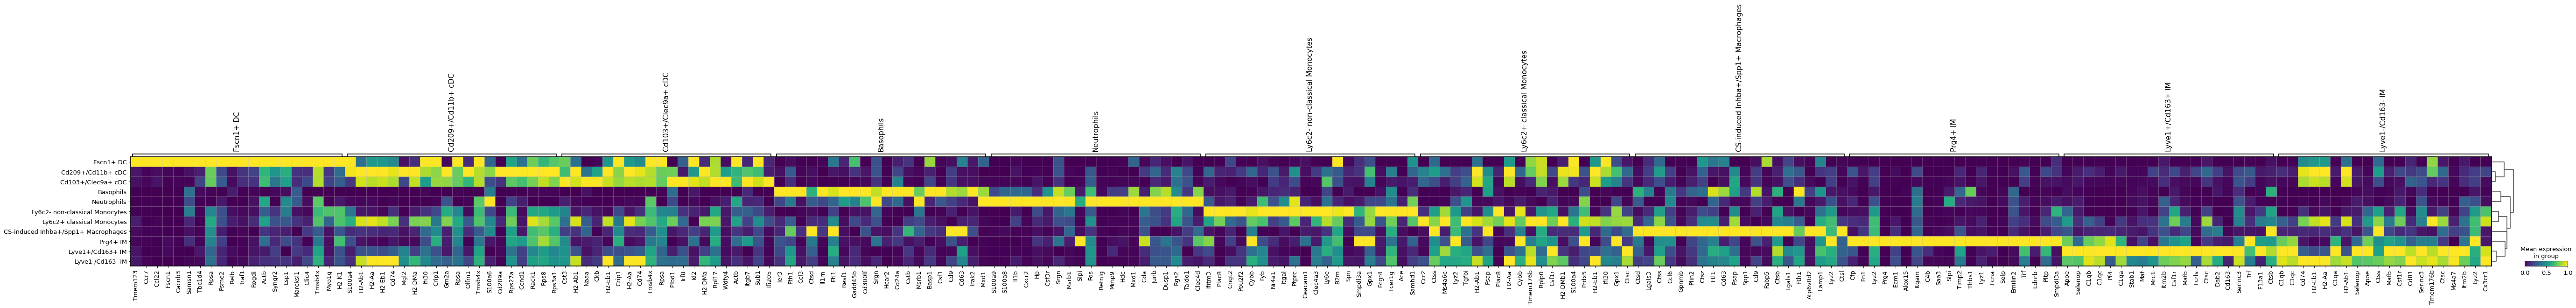

In [25]:
## automated marker heatmap
sc.tl.dendrogram(myeloid, groupby = 'cell_type_refined')
sc.pl.rank_genes_groups_matrixplot(myeloid, n_genes = 20, standard_scale = 'var', save= 'myeloid_auto_marker_matrix.pdf')

In [26]:
## create marker table
result = myeloid.uns['rank_genes_groups']
all_markers = []
for cluster in result['names'].dtype.names:
    current = pd.DataFrame({'gene': result['names'][cluster], 'score': result['scores'][cluster],
                            'logfoldchange': result['logfoldchanges'][cluster], 'pval': result['pvals'][cluster],
                            'pval_adj': result['pvals_adj'][cluster], 'cell_type': cluster})
    all_markers.append(current)
all_markers = pd.concat(all_markers)
all_markers.shape
all_markers.head()

,gene,score,logfoldchange,pval,pval_adj,cell_type
0,Ctsd,38.840794,3.689324,0.000000e+00,0.000000e+00,CS-induced Inhba+/Spp1+ Macrophages
1,Lgals3,38.769058,3.300771,0.000000e+00,0.000000e+00,CS-induced Inhba+/Spp1+ Macrophages
2,Ctss,33.949844,2.400487,1.226175e-252,1.153136e-248,CS-induced Inhba+/Spp1+ Macrophages
3,Ccl6,33.691727,3.549116,7.641076e-249,5.389442e-245,CS-induced Inhba+/Spp1+ Macrophages
4,Gpnmb,33.608856,5.776122,1.245389e-247,7.027230e-244,CS-induced Inhba+/Spp1+ Macrophages


In [27]:
## subset to 'CS-induced Inhba+/Spp1+ Macrophages' only
all_markers = all_markers[all_markers.cell_type.isin(['CS-induced Inhba+/Spp1+ Macrophages'])].copy()
all_markers.head()

,gene,score,logfoldchange,pval,pval_adj,cell_type
0,Ctsd,38.840794,3.689324,0.000000e+00,0.000000e+00,CS-induced Inhba+/Spp1+ Macrophages
1,Lgals3,38.769058,3.300771,0.000000e+00,0.000000e+00,CS-induced Inhba+/Spp1+ Macrophages
2,Ctss,33.949844,2.400487,1.226175e-252,1.153136e-248,CS-induced Inhba+/Spp1+ Macrophages
3,Ccl6,33.691727,3.549116,7.641076e-249,5.389442e-245,CS-induced Inhba+/Spp1+ Macrophages
4,Gpnmb,33.608856,5.776122,1.245389e-247,7.027230e-244,CS-induced Inhba+/Spp1+ Macrophages


In [28]:
## sort marker gene table by log FC and adjusted p Value and filter by p value
all_markers = all_markers[all_markers.pval_adj < 0.1].copy()
all_markers = all_markers[all_markers.logfoldchange > 0.5].copy()
all_markers = all_markers.sort_values(['logfoldchange','pval_adj'], ascending=[False,True])
all_markers = all_markers.set_index('gene')
all_markers.head()

,score,logfoldchange,pval,pval_adj,cell_type
gene,,,,,
Gpnmb,33.608856,5.776122,1.245389e-247,7.027230e-244,CS-induced Inhba+/Spp1+ Macrophages
Cd200r4,13.530412,5.744105,1.034431e-41,3.279145e-39,CS-induced Inhba+/Spp1+ Macrophages
Spp1,28.984821,5.327561,1.022209e-184,2.621780e-181,CS-induced Inhba+/Spp1+ Macrophages
Car6,3.174608,5.323031,1.500387e-03,2.822029e-02,CS-induced Inhba+/Spp1+ Macrophages
Ctsk,21.130575,5.304406,4.164480e-99,3.916415e-96,CS-induced Inhba+/Spp1+ Macrophages


In [29]:
## compute pct expressed table
pct_expr_ct = pd.DataFrame(columns=myeloid.raw.var_names, index=myeloid.obs['marker_group'].cat.categories) 
for cluster in myeloid.obs.marker_group.cat.categories:
    cells = myeloid.obs_names[myeloid.obs['marker_group'] == cluster]
    pct_expr_ct.loc[cluster] = (myeloid.raw[cells].X > 0).sum(0) / myeloid.raw[cells].X.shape[0]
pct_expr_ct = pct_expr_ct.transpose()
pct_expr_ct.rename(columns = {'CS-induced Inhba+/Spp1+ Macrophages': 'pct.CS-induced Inhba+/Spp1+ Macrophages', 'background': 'pct.background'}, inplace = True)
pct_expr_ct.head()

,pct.CS-induced Inhba+/Spp1+ Macrophages,pct.background
0610009B22Rik,0.0427,0.019364
0610009E02Rik,0.002755,0.003972
0610009L18Rik,0.009642,0.007448
0610010F05Rik,0.07989,0.032646
0610010K14Rik,0.006887,0.011668


In [30]:
## join marker table with pct expressed table
marker_table = pd.concat([all_markers, pct_expr_ct], join = 'inner', axis=1)
marker_table.head()

,score,logfoldchange,pval,pval_adj,cell_type,pct.CS-induced Inhba+/Spp1+ Macrophages,pct.background
Gpnmb,33.608856,5.776122,1.245389e-247,7.027230e-244,CS-induced Inhba+/Spp1+ Macrophages,0.779614,0.049901
Cd200r4,13.530412,5.744105,1.034431e-41,3.279145e-39,CS-induced Inhba+/Spp1+ Macrophages,0.30854,0.00571
Spp1,28.984821,5.327561,1.022209e-184,2.621780e-181,CS-induced Inhba+/Spp1+ Macrophages,0.687328,0.062314
Car6,3.174608,5.323031,1.500387e-03,2.822029e-02,CS-induced Inhba+/Spp1+ Macrophages,0.073003,0.001986
Ctsk,21.130575,5.304406,4.164480e-99,3.916415e-96,CS-induced Inhba+/Spp1+ Macrophages,0.493113,0.023337


In [31]:
## reorder columns to make things more intuitive for the reader
marker_table = marker_table[['cell_type', 'score', 'logfoldchange', 'pct.CS-induced Inhba+/Spp1+ Macrophages', 'pct.background', 'pval', 'pval_adj']]
marker_table.head()

,cell_type,score,logfoldchange,pct.CS-induced Inhba+/Spp1+ Macrophages,pct.background,pval,pval_adj
Gpnmb,CS-induced Inhba+/Spp1+ Macrophages,33.608856,5.776122,0.779614,0.049901,1.245389e-247,7.027230e-244
Cd200r4,CS-induced Inhba+/Spp1+ Macrophages,13.530412,5.744105,0.30854,0.00571,1.034431e-41,3.279145e-39
Spp1,CS-induced Inhba+/Spp1+ Macrophages,28.984821,5.327561,0.687328,0.062314,1.022209e-184,2.621780e-181
Car6,CS-induced Inhba+/Spp1+ Macrophages,3.174608,5.323031,0.073003,0.001986,1.500387e-03,2.822029e-02
Ctsk,CS-induced Inhba+/Spp1+ Macrophages,21.130575,5.304406,0.493113,0.023337,4.164480e-99,3.916415e-96


In [32]:
## save marker table
marker_table.to_csv('/home/niklas/projects/macrophages_smoking_THOMAS/01_data/210505_CS_induced_macrophages_marker_genes.csv')